<a href="https://colab.research.google.com/github/harvinderchahal/DEC2024/blob/main/RF_EDA_ngsim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ngsim.csv to ngsim (31).csv
Summary Statistics:
        Vehicle_ID      Frame_ID  Total_Frames   Global_Time     Local_X  \
count   999.000000    999.000000    999.000000  9.990000e+02  999.000000   
mean   1392.102102   5861.225225    928.979980  1.030571e+12   24.715875   
std     820.773005   2690.498540    437.659222  2.997514e+11   24.719478   
min       5.000000    101.000000     10.000000  1.163052e+09  -75.127000   
25%     704.000000   3551.000000    623.000000  1.110000e+12    8.124500   
50%    1341.000000   6336.000000    857.000000  1.120000e+12   28.282000   
75%    2043.000000   8190.500000   1106.000000  1.120000e+12   41.643500   
max    3333.000000  11510.000000   2377.000000  1.120000e+12   87.128000   

           Local_Y      Global_X      Global_Y    v_length     v_Width  ...  \
count   999.000000  9.990000e+02  9.990000e+02  999.000000  999.000000  ...   
mean    945.739670  6.037569e+06  1.888179e+06   15.652953    6.587988  ...   
std     583.599622  1.1

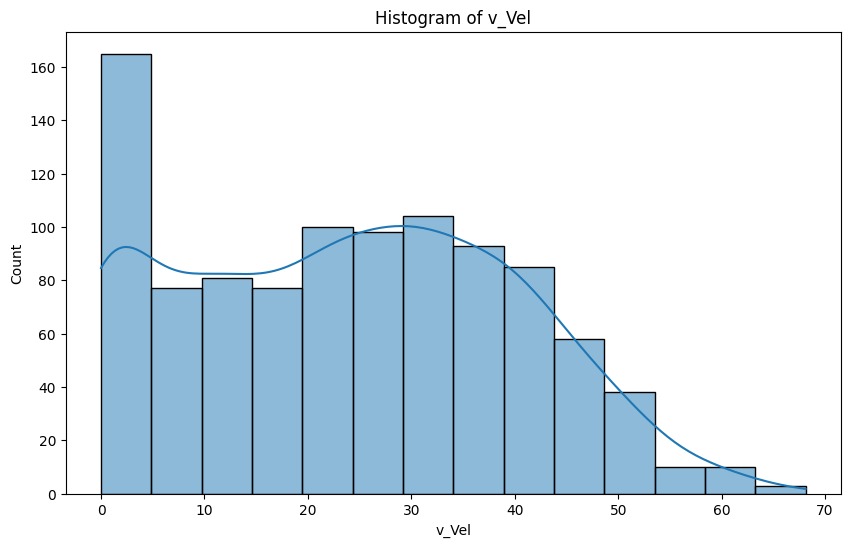

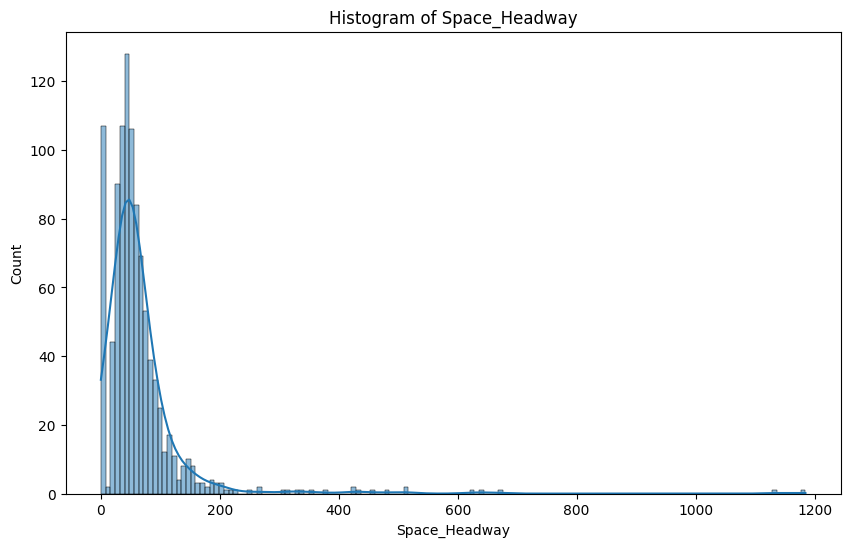

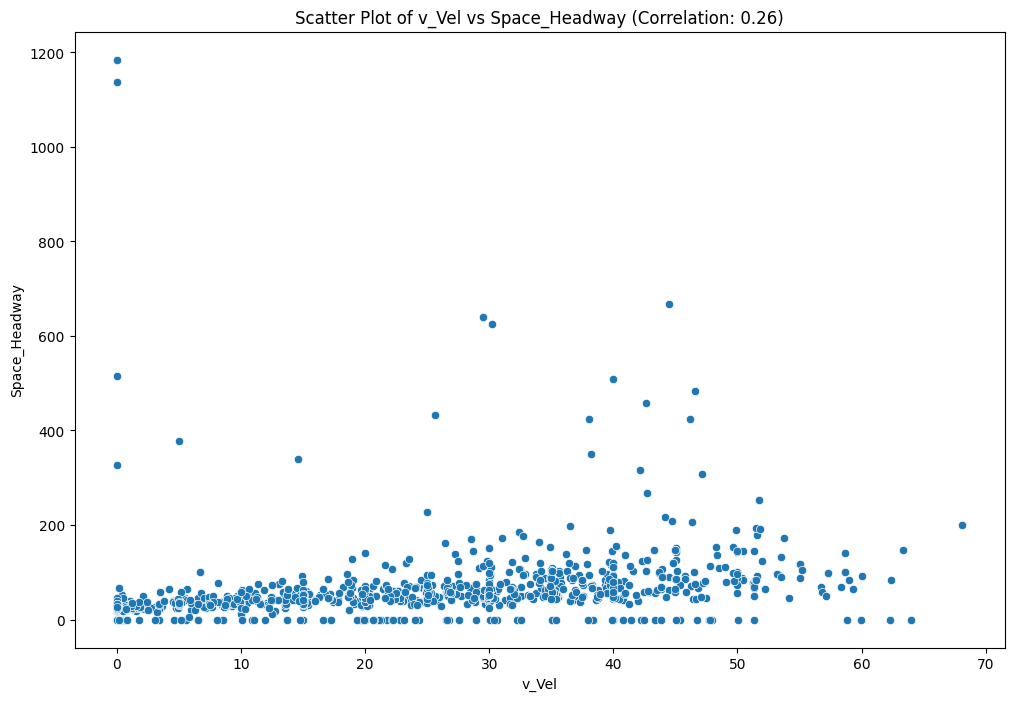

Correlation between v_Vel and Space_Headway: 0.26


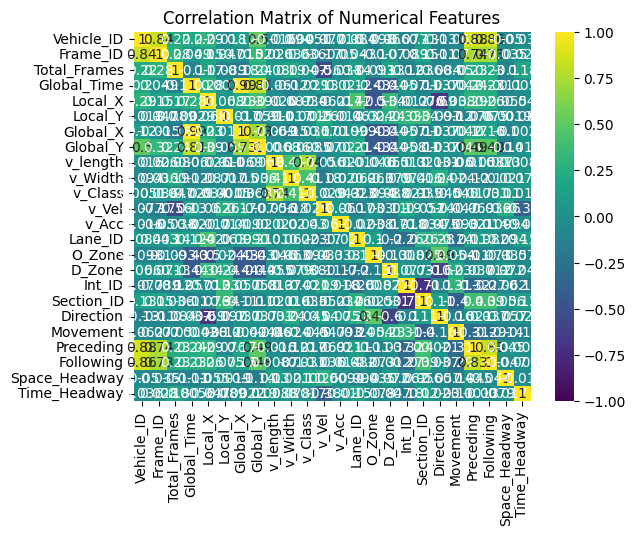

ValueError: could not convert string to float: 'lankershim'

In [37]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# DataLoader class for loading data
class DataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        return self.data

# EDA class for exploratory data analysis
class EDA:
    def __init__(self, data):
        self.data = data

    def summary_statistics(self):
        print("Summary Statistics:")
        print(self.data.describe())

    def plot_histogram(self, column):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.show()

    def plot_correlation(self, column1, column2):
        correlation = self.data[[column1, column2]].corr().iloc[0, 1]
        plt.figure(figsize=(12, 8))
        numerical_data = self.data.select_dtypes(include=np.number)
        sns.scatterplot(x=self.data[column1], y=self.data[column2])
        plt.title(f'Scatter Plot of {column1} vs {column2} (Correlation: {correlation:.2f})')
        plt.show()
        print(f'Correlation between {column1} and {column2}: {correlation:.2f}')

        #sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
        #plt.title('Correlation Matrix')
        #plt.show()

# Machine Learning Model class
class MLModel:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def preprocess_data(self):
        # Encode categorical target variable if necessary
        if self.data[self.target_column].dtype == 'object':
            le = LabelEncoder()
            self.data[self.target_column] = le.fit_transform(self.data[self.target_column])

        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        return X_train_scaled, X_test_scaled, y_train, y_test

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def evaluate_model(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        print(f'Model Accuracy: {accuracy}')
        print(f'Confusion Matrix:\n{cm}')
        print(f'Classification Report:\n{cr}')

# Usage
from google.colab import files
uploaded = files.upload()

# Load data
data_loader = DataLoader('ngsim.csv')
data = data_loader.load_data()

# Perform EDA
eda = EDA(data)
eda.summary_statistics()
#eda.plot_histogram('Vehicle_ID')
#eda.plot_histogram('v_Vel')
#eda.plot_histogtram('Global_X')
#eda.plot_hostogram('Global_Y')
#eda.plot_correlation_matrix()

eda.plot_histogram('v_Vel')
eda.plot_histogram('Space_Headway')
eda.plot_correlation('v_Vel','Space_Headway')
#sns.heatmap('v_Vel')
numerical_data = data.select_dtypes(include='number')
sns.heatmap(numerical_data.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Train Machine Learning Model
target_column = 'v_Vel'  # Replace with your target column
ml_model = MLModel(data, target_column)
X_train, X_test, y_train, y_test = ml_model.preprocess_data()
ml_model.train_model(X_train, y_train)
ml_model.evaluate_model(X_test, y_test)
